In [57]:
'''Analysis of the matching for Generated fingerprints'''
import os
import pandas as pd
from glob import glob
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
input_matches_folder = '/home/citer/Desktop/GANS/Matching/Generated_Generated/Matching_Gen/'

In [3]:
files = glob(os.path.join(input_matches_folder,'*'))

In [4]:
len(files)

50048

In [5]:
file = files[0]
file

'/home/citer/Desktop/GANS/Matching/Generated_Generated/Matching_Gen/18494.scr'

In [ ]:
Comparisons = pd.DataFrame()
for file in files:
    t = pd.read_csv(file, sep=' ', header=None)
    prob = file.split('/')[-1][:-4]
    t.columns=['Score', 'Gallery']
    t['Probe'] = prob
    t['Gallery'] = t['Gallery'].apply(lambda x: x.split('/')[-1][:-4])
    t = t.sort_values('Score', ascending=False)
    t = t.iloc[0:50,:]
    Comparisons = pd.concat([Comparisons,t])

In [17]:
Comparisons.shape

(2502400, 4)

In [88]:
'''Saving to repository'''
Comparisons.to_pickle('/home/citer/Desktop/Fingerprint_synthesize/Matching/Gen_Gen_matching.p')

In [18]:
Comparisons.head()

,Score,Gallery,Probe,Mated
18494,499,18494,18494,True
18366,66,18366,18494,False
8126,64,8126,18494,False
17918,63,17918,18494,False
28670,63,28670,18494,False


In [19]:
Comparisons.Gallery = Comparisons.Gallery.astype(int)

In [20]:
Comparisons.Probe = Comparisons.Probe.astype(int)

In [21]:
Comparisons['Mated'] = Comparisons.Gallery==Comparisons.Probe

In [22]:
Mated = Comparisons[Comparisons.Mated==True]
Non_Mated = Comparisons[Comparisons.Mated==False]

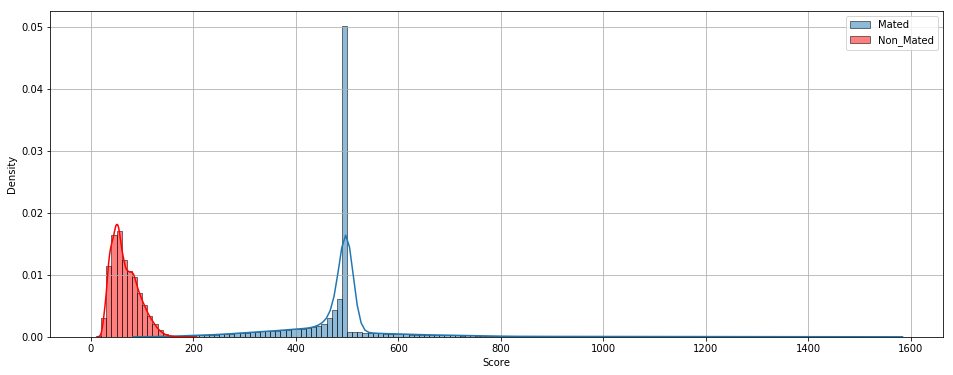

In [48]:
plt.figure(figsize=(16,6))
sns.histplot(Mated.Score,label='Mated', bins=bins, stat='density', kde=True)
sns.histplot(Non_Mated.Score,bins=bins, color='r', label='Non_Mated', stat='density', kde=True)
plt.grid()
plt.legend()

In [39]:
len(Non_Mated)

2452352

In [49]:
Mated.Score.min()

82

In [50]:
Non_Mated.Score.max()

206

In [51]:
len(Comparisons.Probe.unique())

50048

In [58]:
'''ROC'''
L1 = np.ones((len(Mated),1)) 
L2 = np.zeros((len(Non_Mated),1))
L = np.concatenate([L1,L2])
Score = np.concatenate([Mated.Score.to_numpy(), Non_Mated.Score.to_numpy()])
fpr, tpr, thr = roc_curve(L, Score)
roc_auc = auc(fpr, tpr)

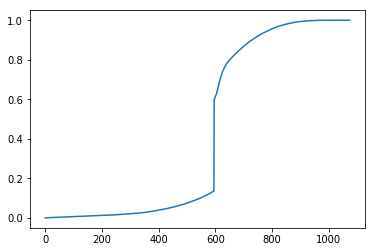

In [69]:
plt.plot(tpr)

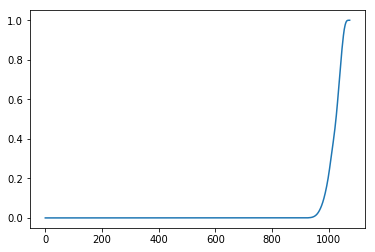

In [74]:
plt.plot(fpr)

In [108]:
fpr[880]

0.0

In [109]:
tpr[880]

0.9896099744245525

In [110]:
thr[880]

207

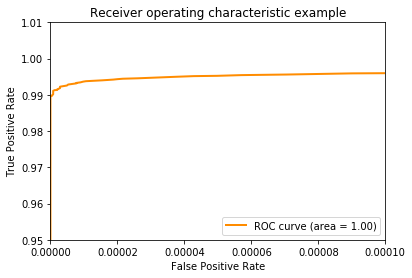

In [97]:
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 0.0001])
plt.ylim([0.95, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()